In [1]:
import pandas as pd
from glob import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
infiles = glob('./lam_drop*.csv')
dataframes = [pd.read_csv(f, index_col=0) for f in infiles]
model_performance = pd.concat(dataframes, ignore_index=True)
print model_performance.head()

   lam_avi  lam_drop  lam_pot       rmse
0      0.0       0.0      0.0  19.631845
1      0.0       0.0      0.6   2.044502
2      0.0       0.0      1.2   2.131760
3      0.0       0.0      1.8   1.584565
4      0.0       0.0      2.4   0.911395


In [12]:
fit_params = [c for c in model_performance.columns.values if c != 'rmse']
metrics = ['rmse']

Best fit (optimizing rmse):
lam_avi     2.400000
lam_drop    1.500000
lam_pot     2.400000
rmse        0.652889
Name: 136, dtype: float64


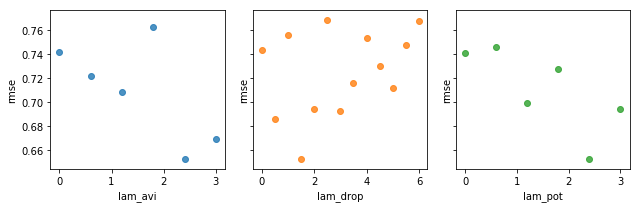

In [14]:
def plot_profile_likelihoods(model_performance, metric='rmse'):
    best_fit = model_performance.ix[model_performance[metric].idxmin()]
    print 'Best fit (optimizing %s):\n'%metric, best_fit
    
    fig, axes = plt.subplots(ncols=len(fit_params), nrows=1, figsize=(3*len(fit_params), 3), sharey=True)
    for profile_param,ax in zip(fit_params, axes):
        
        fixed_params = [p for p in fit_params if p != profile_param]
        
        plot_data = model_performance
        for fp in fixed_params:
            plot_data = plot_data.loc[plot_data[fp] == best_fit[fp]]
        
        sns.regplot(profile_param, metric, data=plot_data, fit_reg=False, ax=ax)
        ax.set_xlabel(profile_param)
        ax.set_ylabel(metric)
        
    plt.tight_layout()
#     plt.savefig('../profile-likelihoods/%s_%s_perf.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return best_fit

    
rmse = plot_profile_likelihoods(model_performance, 'rmse')

In [15]:
model_performance.to_csv('./titer_model_performance.csv')

In [8]:
def generate_table(best_fit, metric, genres, antres):
    fit_dict = best_fit.to_dict()
    fit_dict['DENV4_f0'] = 0.0
    
    if metric == 'delta_sse':
        metric_str = '$\Delta$ SSE'
    elif metric == 'pearson_r2':
        metric_str = 'Pearson $R^2$'
    else:
        metric_str = metric.capitalize()
    metadata = ' & '.join([genres.capitalize(), antres.capitalize(), metric_str, '%.2f'%fit_dict[metric]])
    params = ' & '.join(['%.2f'%fit_dict[param] for param in ['beta', 'gamma', 'sigma', 'DENV1_f0', 'DENV2_f0', 'DENV3_f0', 'DENV4_f0']])
    print(metadata+' & '+params + r' \\ ')
    
generate_table(delta_sse, 'delta_sse', 'Genotype', 'Interserotype')
generate_table(r2, 'pearson_r2', 'Genotype', 'Interserotype')

Genotype & Interserotype & $\Delta$ SSE & 15.65 & 1.79 & 0.57 & 0.57 & 2.00 & 1.00 & 0.64 & 0.00 \\ 
Genotype & Interserotype & Pearson $R^2$ & 0.34 & 0.50 & 0.57 & 0.57 & 1.00 & 1.00 & 0.64 & 0.00 \\ 
